# **Deep Learning for Detecting Pneumonia from X-ray Images**


In [ ]:
import numpy as np # linear algebra
import cv2 # import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = open('/content/drive/MyDrive/Chest_Xray','r')
print(DIR)

In [ ]:
train_folder = '/content/drive/MyDrive/Chest_Xray/train'
test_folder ='/content/drive/MyDrive/Chest_Xray/test'
val_folder ='/content/drive/MyDrive/Chest_Xray/val'

# DATA PREPROCESSING

In [ ]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image

def get_data_train(data_dir):
    data = []
    
    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if(count > 1341):
                  break
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
import os
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# TRAIN TEST SPLIT

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [ ]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255


In [ ]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

# **CONVOLUTIONAL NEURAL NETWORK BASED MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/12
84/84 [==============================] - 8s 12ms/step - loss: 0.5860 - accuracy: 0.6266 - val_loss: 0.1628 - val_accuracy: 0.9508
Epoch 2/12
84/84 [==============================] - 1s 7ms/step - loss: 0.1413 - accuracy: 0.9512 - val_loss: 0.2331 - val_accuracy: 0.9098
Epoch 3/12
84/84 [==============================] - 1s 7ms/step - loss: 0.1329 - accuracy: 0.9567 - val_loss: 0.1038 - val_accuracy: 0.9687
Epoch 4/12
84/84 [==============================] - 1s 7ms/step - loss: 0.1027 - accuracy: 0.9616 - val_loss: 0.0820 - val_accuracy: 0.9724
Epoch 5/12
84/84 [==============================] - 1s 7ms/step - loss: 0.0951 - accuracy: 0.9659 - val_loss: 0.1723 - val_accuracy: 0.9321
Epoch 6/12
84/84 [==============================] - 1s 7ms/step - loss: 0.1160 - accuracy: 0.9504 - val_loss: 0.0756 - val_accuracy: 0.9732
Epoch 7/12
84/84 [==============================] - 1s 7ms/step - loss: 0.0905 - accuracy: 0.9668 - val_loss: 0.0811 - val_accuracy: 0.9713
Epoch 8/12
84/84 [=

In [ ]:
import keras

model.save("cnn.h5")
model = keras.models.load_model("cnn.h5")

y_pred = model.predict(X_test)

## **TESTING ON UNSEEN DATA**

[[0.]]


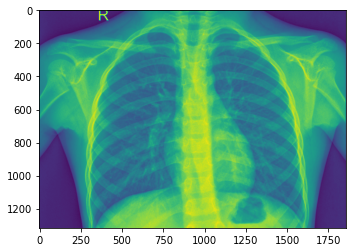

In [ ]:
#print(labels[int(prediction[0])])
import matplotlib.pyplot as plt
img = cv2.imread("/content/test3.jpeg", cv2.IMREAD_GRAYSCALE)
#cv2.imshow("Test",img)
new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
new_array = np.reshape(new_array,(1,50,50,1))
plt.imshow(img)
prediction = model.predict(new_array)
print(prediction)
if(int(prediction[0]) == 1):
  print("\n\nHey! You are suffering from Pneumonia.\nSome Precautions that you can take: \n1. Consult a nearby doctor at the earliest.\n2. You must give a try for Saltwater Gargle.\n3. Drink Hot Peppermint Tea.\n4. Drink at least 8 cups of water or liquid per day. Liquids help to thin mucous and keep your fever down.\n5. Stick to your treatment plan.")
else:
  print("You're out of danger! Stay Safe!")

[[1.]]


Hey! You are suffering from Pneumonia.
Some Precautions that you can take: 
1. Consult a nearby doctor at the earliest.
2. You must give a try for Saltwater Gargle.
3. Drink Hot Peppermint Tea.
4. Drink at least 8 cups of water or liquid per day. Liquids help to thin mucous and keep your fever down.
5. Stick to your treatment plan.


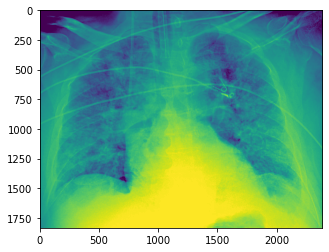

In [ ]:
#print(labels[int(prediction[0])])
import matplotlib.pyplot as plt
img = cv2.imread("/content/test2.jpg", cv2.IMREAD_GRAYSCALE)
#cv2.imshow("Test",img)
new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
new_array = np.reshape(new_array,(1,50,50,1))
plt.imshow(img)
prediction = model.predict(new_array)
print(prediction)
if(int(prediction[0]) == 1):
  print("\n\nHey! You are suffering from Pneumonia.\nSome Precautions that you can take: \n1. Consult a nearby doctor at the earliest.\n2. You must give a try for Saltwater Gargle.\n3. Drink Hot Peppermint Tea.\n4. Drink at least 8 cups of water or liquid per day. Liquids help to thin mucous and keep your fever down.\n5. Stick to your treatment plan.")

# **ANALYSIS OF TRAINED MODEL**

In [ ]:
from sklearn.metrics import confusion_matrix

y_f= []
for i in y_pred:
  if (i[0] > 0.5):
    y_f.append(1)
  else:
    y_f.append(0)

cm = confusion_matrix(y_test, y_f)


# 1.CONFUSION MATRIX

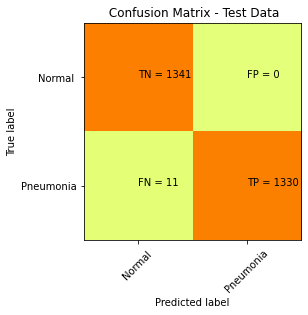

In [ ]:
plt.clf()
classNames = ["Normal ", "Pneumonia"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# 2.ACCURACY VS EPOCH

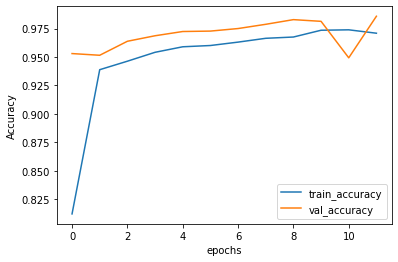

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

# 3.LOSS VS EPOCH

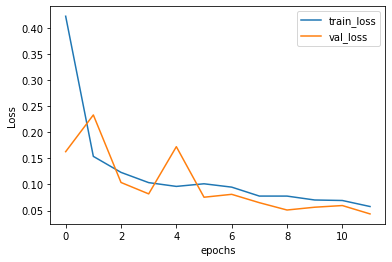

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()